In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
dfmhs = pd.read_csv('datamining.csv',sep=';',engine='python')

In [31]:
dfmhs.describe()

,UTS,UAS,TUGAS
count,20.00000,20.000000,20.000000
mean,76.25000,59.300000,83.850000
std,12.20386,25.639402,5.363375
min,56.00000,20.000000,75.000000
25%,66.50000,39.250000,80.000000
50%,79.00000,66.500000,83.500000
75%,82.75000,80.250000,88.250000
max,97.00000,94.000000,93.000000


Text(0.5, 1.0, 'Grafik Nilai Mahasiswa')

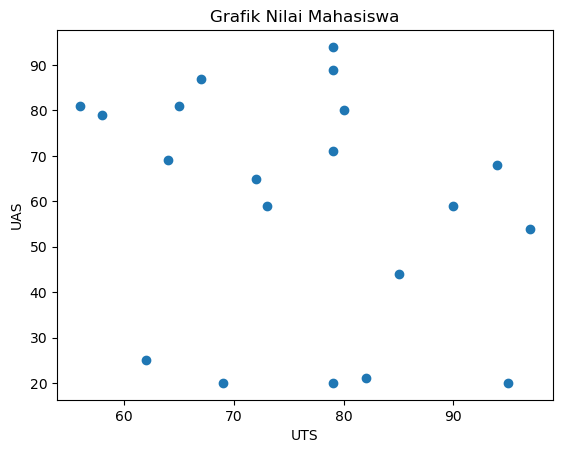

In [33]:
#visualisasi
plt.scatter(dfmhs['UTS'],dfmhs['UAS'])
plt.xlabel("UTS")
plt.ylabel("UAS")
plt.title("Grafik Nilai Mahasiswa")

In [34]:
x_train = dfmhs[['UTS','UAS']].values

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)

In [36]:
x_train

array([[0.56097561, 0.68918919],
       [0.14634146, 0.06756757],
       [0.31707317, 0.        ],
       [0.56097561, 0.        ],
       [0.19512195, 0.66216216],
       [0.95121951, 0.        ],
       [1.        , 0.45945946],
       [0.41463415, 0.52702703],
       [0.2195122 , 0.82432432],
       [0.56097561, 1.        ],
       [0.3902439 , 0.60810811],
       [0.04878049, 0.7972973 ],
       [0.        , 0.82432432],
       [0.82926829, 0.52702703],
       [0.58536585, 0.81081081],
       [0.56097561, 0.93243243],
       [0.92682927, 0.64864865],
       [0.70731707, 0.32432432],
       [0.63414634, 0.01351351],
       [0.26829268, 0.90540541]])

In [37]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2)
kmean

KMeans(n_clusters=2)

In [38]:
y_cluster = kmean.fit_predict(x_train)

C:\Users\EVA RIYANTI\anaconda3-part2\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\EVA RIYANTI\anaconda3-part2\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [39]:
y_cluster = kmean.fit_predict(x_train)

C:\Users\EVA RIYANTI\anaconda3-part2\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\EVA RIYANTI\anaconda3-part2\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [40]:
dfmhs['Cluster'] = y_cluster

In [41]:
dfmhs

,Nama,UTS,UAS,TUGAS,Cluster
0,Anita Nuraini,79,71,86,1
1,Noval Ramdhan,62,25,88,0
2,Icha Prastuti,69,20,81,0
3,Syahrini Safitri,79,20,83,0
4,Satya Napitulu,64,69,79,1
5,Hana Winarsih,95,20,86,0
6,Kezia Pudjiastuti,97,54,85,0
7,Humaira Riyanti,73,59,75,1
8,Rudi Suryono,65,81,83,1
9,Anita Fujiati,79,94,75,1


In [42]:
kmean.cluster_centers_

array([[0.67479675, 0.22672673],
       [0.345898  , 0.78009828]])

C:\Users\EVA RIYANTI\AppData\Local\Temp\ipykernel_16104\417067655.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmean.cluster_centers_[0, 0], kmean.cluster_centers_[0, 1], cmap='rainbow', marker='*', s=150, label='Centroid 0')
C:\Users\EVA RIYANTI\AppData\Local\Temp\ipykernel_16104\417067655.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmean.cluster_centers_[1, 0], kmean.cluster_centers_[1, 1], cmap='rainbow', marker='*', s=150, label='Centroid 1')


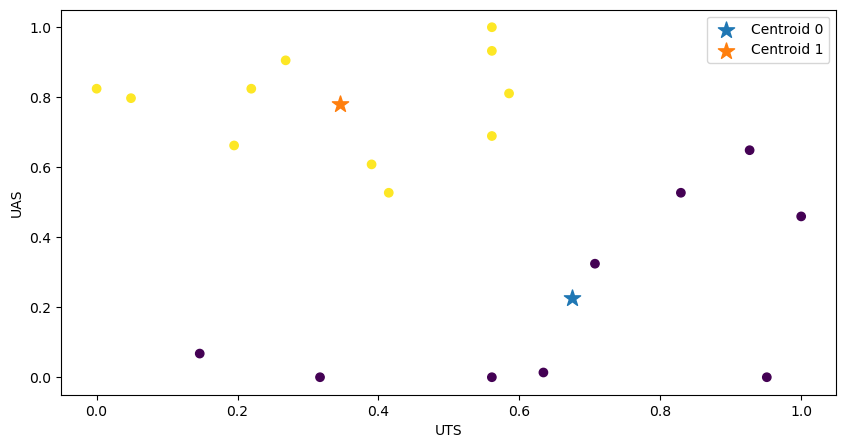

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(x_train[:, 0], x_train[:, 1], c=kmean.labels_)
plt.scatter(kmean.cluster_centers_[0, 0], kmean.cluster_centers_[0, 1], cmap='rainbow', marker='*', s=150, label='Centroid 0')
plt.scatter(kmean.cluster_centers_[1, 0], kmean.cluster_centers_[1, 1], cmap='rainbow', marker='*', s=150, label='Centroid 1')
plt.xlabel("UTS")
plt.ylabel("UAS")
plt.legend()
plt.show()

In [44]:
inertias = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k).fit(x_train)
    inertias.append(km.inertia_)

C:\Users\EVA RIYANTI\anaconda3-part2\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\EVA RIYANTI\anaconda3-part2\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\EVA RIYANTI\anaconda3-part2\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\EVA RIYANTI\anaconda3-part2\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a

In [45]:
inertias

[3.9642714583001095,
 1.9130188833872293,
 1.1187951799661366,
 0.7490689276024582,
 0.5000989789490442,
 0.3466438573483528,
 0.25651742892787477,
 0.18646740297864947,
 0.1366745984533016]

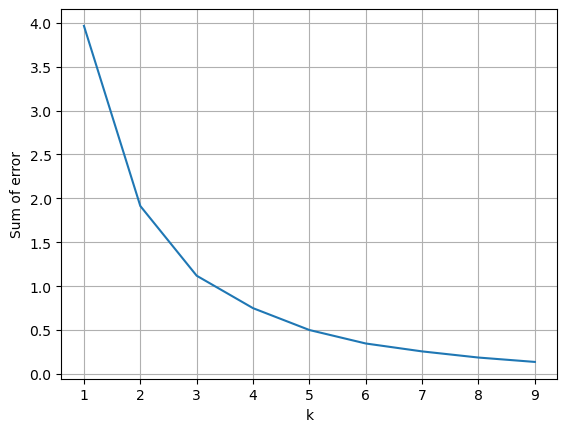

In [46]:
import matplotlib.pyplot as plt

plt.xlabel("k")
plt.ylabel("Sum of error")
plt.plot(k_range, inertias)
plt.grid()
plt.show()

In [47]:
dfmhs['Cluster'] = dfmhs['Cluster'].replace([0,1],['Kurang','Baik'])

In [48]:
dfmhs

,Nama,UTS,UAS,TUGAS,Cluster
0,Anita Nuraini,79,71,86,Baik
1,Noval Ramdhan,62,25,88,Kurang
2,Icha Prastuti,69,20,81,Kurang
3,Syahrini Safitri,79,20,83,Kurang
4,Satya Napitulu,64,69,79,Baik
5,Hana Winarsih,95,20,86,Kurang
6,Kezia Pudjiastuti,97,54,85,Kurang
7,Humaira Riyanti,73,59,75,Baik
8,Rudi Suryono,65,81,83,Baik
9,Anita Fujiati,79,94,75,Baik
